---
# **International E-commerce Analytics 101**
>
> **Analyst:** Shruthi.D.B  
> **Email:** [shruthiyadav75@gmail.com](mailto:shruthiyadav75@gmail.com)  
> **LinkedIn:** [Shruthi D.B](www.linkedin.com/in/shruthiyadav)  
> **Date of Completion:** 2024-04-22

---

<br>

# **Table of Contents**

>## **Platform Setup**
- Installing the required Library
- Importing Packages
- Google Colab User Authentication for Drive, Cloud Storage
- GCP Integration: BigQuery - Colab
- Querying the BigQuery E-commerce Database

>## **Section 1: Exploratory Analysis**
- Query 1.1: Information Schema
- Query 1.2: Calculating Duration and Time Range of Orders
- Query 1.3: Unique Order Statuses

>## **Section 2: In-depth Exploration**
- Query 2.1: Order-Value Trend
- Query 2.2: Analyzing Order Time

>## **Section 3: Evolution of E-commerce**
- Query 3.1: Month-on-Month Orders Placed by State Analysis
- Query 3.2: Customers Distribution across all the States

>## **Section 4: Impact on Economy**
- Query 4.1: Percentage Increase in Order Costs from 2017 to 2018 (January to August)
- Query 4.2: Analyzing the Money movement of E-commerce w.r.t order-prices, Freight, and Others.

>## **Section 5: Analysis based on Sales, Freight and Delivery time.**
- Query 5.1: Analyzing Order Delivery Time and Estimation Accuracy.
- Query 5.2a: Highest Avg Freight Value.
- Query 5.2b: Lowest Avg Freight Value.
- Query 5.3a: Highest Avg Delivery Time.
- Query 5.3b: Lowest Avg Delivery Time.
- Query 5.4: Identifying Top 5 States with Faster-than-Estimated Order Deliveries

>## **Section 6: Analysis based on the Payments**
- Query 6.1: Month-on-Month Analysis of Orders Placed by Payment Types.
- Query 6.2: Analysis of Orders Based on Payment Installments Paid.

>## **Section 7: RFM Analysis.**
- Query 7.1: RFM Score.
- Query 7.1: Customer Segmentation.

>## **Section 8: Strategizing the Opportunity For Market Capture**
- Recommendations

---
<br>

> ### **Introduction**


Target, a globally renowned brand, has expanded its operations to Brazil, offering a unique shopping experience to its customers. With an extensive dataset covering 100,000 orders placed between 2016 and 2018, there is an opportunity to gain valuable insights into Target's operations in Brazil. This analysis aims to provide actionable recommendations to enhance order processing, pricing strategies, payment and shipping efficiency, and overall customer satisfaction.
<br>
<br>

> ### **Objective**


The primary objective of this analysis is to provide Target with actionable insights derived from the dataset, enabling informed decision-making to enhance operational efficiency, customer satisfaction, and overall business performance in the Brazilian market.
<br>
<br>

> ### **Tech-Stack**


- *RDBMS*: BigQuery for storing and querying large datasets.
- *SQL Environment*: SQLite for running SQL queries in a Colab environment.
- *Data Manipulation*: Pandas for dataframe operations.
- *Data Visualization*:
  - Excel Chart
  - Tableau Plot


#**Installing the required Library**

In [1]:
#!pip install sqlalchemy_schemadisplay

In [2]:
#pip install graphviz

#**Importing Packages**

In [3]:
import pandas as pd
from google.cloud import bigquery
from graphviz import Digraph
from IPython.display import Image

#**Google Colab User Authentication for Drive, Cloud Storage**

 This code authenticates a user in Google Colab, enabling access to Google services like Drive, Cloud Storage, and other resources.


In [4]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


#**GCP Integration : BigQuery - Colab**

 In Colab, users can take advantage of the **google.colab.data_table** package to display large pandas dataframes interactively.

Additionally, accessing the BigQuery database is made possible by using the `bigquery.Client` method within the Google Cloud Platform environment. This enables users to retrieve results through BigQuery SQL queries directly from their Colab notebook.


In [5]:
%load_ext google.colab.data_table

#**Querying the BigQuery Ecomerce Database**

# **Section 1: Exploratory Analysis**

###**Query 1.1 : Information Schema**



**INFORMATION_SCHEMA** provides metadata about database objects and enables schema validation. It helps in understanding the database structure, particularly with relationally linked tables using primary and foreign keys. It also provides insights into each column, including its data type, "is_null" characteristics, and more.

In [6]:
# Setting up BigQuery client
client = bigquery.Client(project="edatarget-420910")

# Query to see all the data inside the database
query = """
SELECT table_catalog, table_schema, table_name, column_name, ordinal_position, is_nullable, data_type
FROM `target.INFORMATION_SCHEMA.COLUMNS` ORDER BY table_name
"""

# Execute the query
query_job = client.query(query)
# Fetch results
results = query_job.result()
# Convert results into a DataFrame
df = pd.DataFrame(data=[row.values() for row in results], columns=[field.name for field in results.schema])
# Adding index to the DataFrame
df = df.reset_index(drop=True)
# Display the DataFrame
df

,table_catalog,table_schema,table_name,column_name,ordinal_position,is_nullable,data_type
0,edatarget-420910,target,customers,customer_id,1,YES,STRING
1,edatarget-420910,target,customers,customer_unique_id,2,YES,STRING
2,edatarget-420910,target,customers,customer_zip_code_prefix,3,YES,INT64
3,edatarget-420910,target,customers,customer_city,4,YES,STRING
4,edatarget-420910,target,customers,customer_state,5,YES,STRING
5,edatarget-420910,target,geolocation,geolocation_zip_code_prefix,1,YES,INT64
6,edatarget-420910,target,geolocation,geolocation_lat,2,YES,FLOAT64
7,edatarget-420910,target,geolocation,geolocation_lng,3,YES,FLOAT64
8,edatarget-420910,target,geolocation,geolocation_city,4,YES,STRING
9,edatarget-420910,target,geolocation,geolocation_state,5,YES,STRING


**BigQuery Schema Visualization Script**


An **Entity-Relationship Diagram** (ERD) visually represents entities (objects), attributes (properties), and relationships in a database, aiding in understanding data organization and connections between entities.

This code generates an Entity-Relationship Diagram (ERD) from a DataFrame representing table metadata. It groups the DataFrame by table name, aggregates column names and data types, then creates a graph using the **Graphviz library** (Digraph object) to visualize the relationships between tables and their columns. It also adds edges for foreign key relationships and renders the graph.

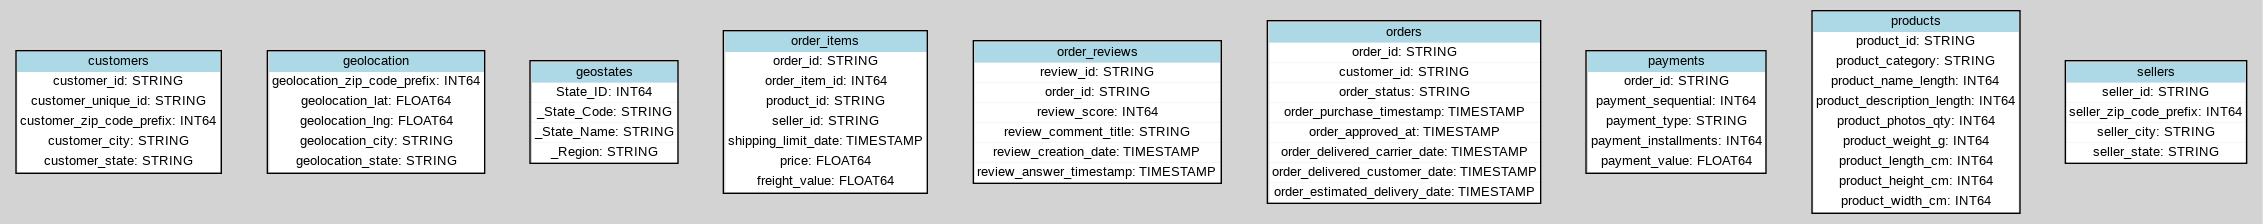

In [7]:
# Group the DataFrame by table_name and aggregate column names and data types
columns_per_table = df.groupby('table_name').apply(lambda x: list(zip(x['column_name'], x['data_type']))).to_dict()

# Initialize a Digraph object with improved styling
dot = Digraph(node_attr={'shape': 'plaintext', 'fontsize': '10', 'fontname': 'Helvetica'},
              graph_attr={'rankdir': 'TB', 'bgcolor': 'lightgray'})

# Add nodes for each table with column names and data types
for table_name, columns in columns_per_table.items():
    label = "<<TABLE BORDER='1' CELLBORDER='0' CELLSPACING='0'>"
    label += f"<TR><TD BGCOLOR='lightblue'><FONT COLOR='black'>{table_name}</FONT></TD></TR>"
    label += ''.join([f"<TR><TD PORT='{col}' BGCOLOR='white'><FONT COLOR='black'>{col}: {data_type}</FONT></TD></TR>" for col, data_type in columns])
    label += "</TABLE>>"
    dot.node(table_name, label)

# Add edges for foreign key relationships
for _, row in df.iterrows():
    if row['is_nullable'] == 'NO':
        dot.edge(row['table_name'], row['column_name'], color='darkgreen', fontcolor='darkgreen')

# Render the graph to a file
dot.render('erd_diagram', format='png', cleanup=True)

# Display the rendered image
Image('erd_diagram.png')


###**Query 1.2 : Calculating Duration and Time Range of Orders**


This SQL code calculates the range of order times and duration between the earliest and latest orders, providing insights for business scheduling, inventory management, and advertising optimization based on order patterns.

In [8]:
query = """
WITH OrderTimingRange AS (
    SELECT
        MIN(TIME(order_purchase_timestamp)) AS MinOrderTime,
        MAX(TIME(order_purchase_timestamp)) AS MaxOrderTime
    FROM target.orders
)

SELECT
    MinOrderTime AS EarliestOrderTime,
    MaxOrderTime AS LatestOrderTime,
    EXTRACT(HOUR FROM (MaxOrderTime - MinOrderTime)) AS DurationHrs
FROM OrderTimingRange;

"""
df = client.query(query).to_dataframe()
df


,EarliestOrderTime,LatestOrderTime,DurationHrs
0,00:00:00,23:59:59,23


**The hour part** was observed as '_23 hours_' (within a range of 23 hours 59 minutes), prompting an investigation into whether this result was influenced by outliers.


**Analyzing Order Timing Distribution**

**Investigating** the distribution pattern of order placement with respect to the **hours of the day** to check the possibility of outliers.

In [9]:
query = """
WITH OrderTimingRange AS (
    SELECT
        DATE(order_purchase_timestamp) AS order_date,
        MIN(TIME(order_purchase_timestamp)) AS MinOrderTime,
        MAX(TIME(order_purchase_timestamp)) AS MaxOrderTime
    FROM target.orders
    GROUP BY order_date
),

DurationRangeBins AS (
    SELECT
        order_date,
        MinOrderTime AS EarliestOrderTime,
        MaxOrderTime AS LatestOrderTime,
        EXTRACT(HOUR FROM(MaxOrderTime - MinOrderTime)) AS DurationHrs
    FROM OrderTimingRange
)
SELECT
    DurationHrs,
    COUNT(1) AS countofdays,
    ROUND(COUNT(1) / SUM(COUNT(1)) OVER () * 100, 1) AS percentage_of_days
FROM DurationRangeBins
GROUP BY DurationHrs
ORDER BY DurationHrs DESC;
"""
df = client.query(query).to_dataframe()
df

,DurationHrs,countofdays,percentage_of_days
0,23,497,78.4
1,22,68,10.7
2,21,14,2.2
3,20,7,1.1
4,19,2,0.3
5,18,3,0.5
6,16,1,0.2
7,15,2,0.3
8,14,5,0.8
9,13,3,0.5


The analysis results show that **seventy-eight percent** of the days within the dataset fell into the **23-hour range**. This indicates that it was not an outlier; instead, **the majority of orders** spanned for almost 23+ hours on 497 days.

Thus, it is conclusive to answer:
**The orders were placed** between 12 AM to 11:59 PM (23 Plus hours).


###**Query 1.3 : Unique Order Statuses**


This query provides a list of distinct order statuses present in the dataset.

In [10]:
query = """
SELECT DISTINCT
  order_status
FROM
  target.orders;
"""
df = client.query(query).to_dataframe()
df

,order_status
0,created
1,shipped
2,approved
3,canceled
4,invoiced
5,delivered
6,processing
7,unavailable


This output provides insights into designing our filter condition. <br>It is understood that we need to exclude records with `'canceled', 'processing', and 'unavailable'` as order statuses.
<br>


**Customer City and State Counts Excluding insignificant Order Statuses**

In [11]:
query = """
SELECT
    COUNT(DISTINCT C.customer_city) AS City_Count,
    COUNT(DISTINCT C.customer_state) AS State_Count
FROM
    target.customers C
JOIN
    target.orders O USING (customer_id)
WHERE
    O.order_status NOT IN ('canceled', 'processing', 'unavailable');
"""
df = client.query(query).to_dataframe()
df

,City_Count,State_Count
0,4103,27


By applying this filter, we obtain 4103 unique cities across 27 states.<br><br>

# **Section 2: In-depth Exploration**

**Exploring Order Trends**

1. **Yearly Order Growth**: Is there a trend of increasing orders over the years?

2. **Monthly Seasonality**: Can we observe monthly patterns in order volumes?

3. **Time-of-Day Ordering Habits**: When do Brazilian customers typically place orders?
   - Dawn (0-6 hrs)
   - Morning (7-12 hrs)
   - Afternoon (13-18 hrs)
   - Night (19-23 hrs)


###**Query 2.1 : Order-Value Trend**





In [12]:
query = """
WITH OrderTrends AS (
    SELECT
        EXTRACT(YEAR FROM o.order_purchase_timestamp) AS order_year,
        EXTRACT(MONTH FROM o.order_purchase_timestamp) AS order_month,
        ROUND(SUM(oi.price + oi.freight_value), 2) AS revenue,
        COUNT(DISTINCT o.order_id) AS num_orders
    FROM
        target.orders o
    JOIN
        target.order_items oi ON o.order_id = oi.order_id
    GROUP BY
        order_year, order_month
    ORDER BY
        order_year, order_month
)
SELECT
    order_year,
    order_month,
    revenue,
    ROUND((revenue - LAG(revenue) OVER (ORDER BY order_year, order_month)) / NULLIF(LAG(revenue) OVER (ORDER BY order_year, order_month), 0) * 100, 2) AS percent_revenue_change,
    num_orders,
    ROUND((num_orders - LAG(num_orders) OVER (ORDER BY order_year, order_month)) / NULLIF(LAG(num_orders) OVER (ORDER BY order_year, order_month), 0) * 100, 2) AS percent_num_orders_change
FROM
    OrderTrends
WHERE
    order_year IN (2017, 2018)
ORDER BY
    order_year, order_month;
"""
df = client.query(query).to_dataframe()
df

,order_year,order_month,revenue,percent_revenue_change,num_orders,percent_num_orders_change
0,2017,1,137188.49,NaN,789,NaN
1,2017,2,286280.62,108.68,1733,119.65
2,2017,3,432048.59,50.92,2641,52.39
3,2017,4,412422.24,-4.54,2391,-9.47
4,2017,5,586190.95,42.13,3660,53.07
5,2017,6,502963.04,-14.20,3217,-12.10
6,2017,7,584971.62,16.31,3969,23.38
7,2017,8,668204.60,14.23,4293,8.16
8,2017,9,720398.91,7.81,4243,-1.16
9,2017,10,769312.37,6.79,4568,7.66


**Viz: Waterfall Chart for Order-Volume Trend Analysis**

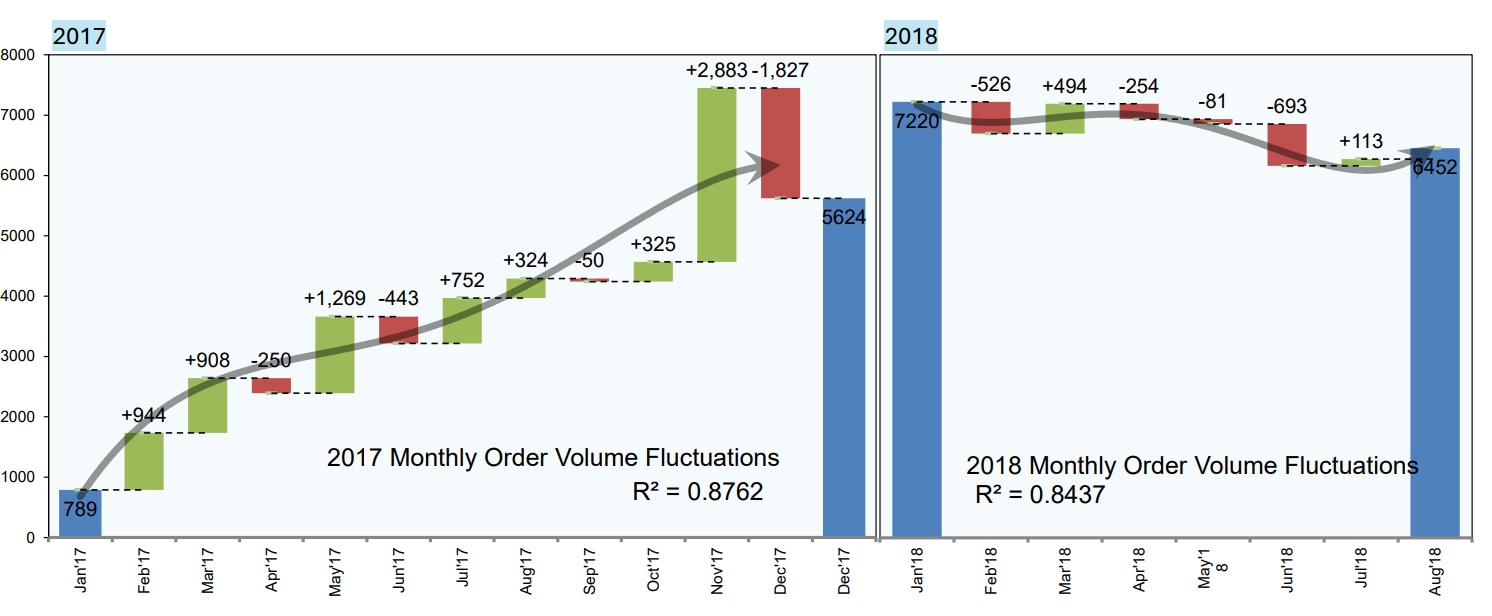

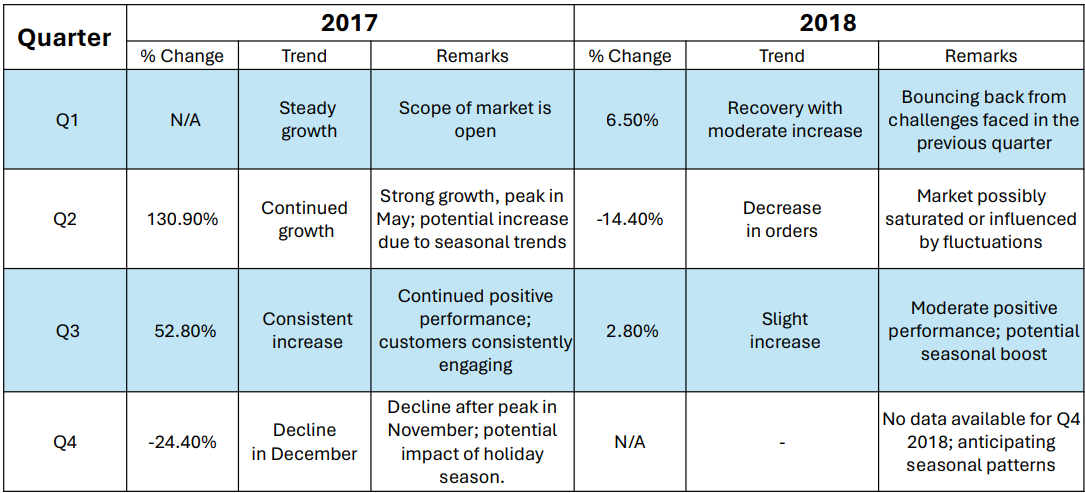

**Inference of Result**

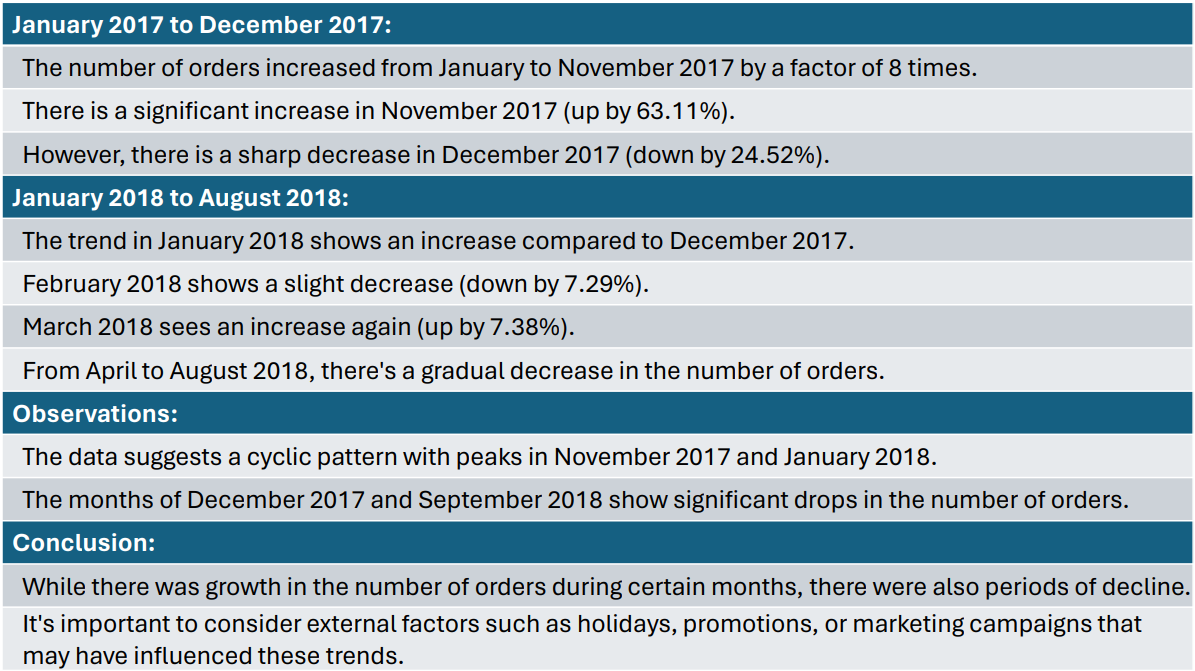

**Analysis of Order Times by Time Category**

In [13]:
query = """
WITH OrderTimes AS (
    SELECT
        CASE
            WHEN EXTRACT(HOUR FROM order_purchase_timestamp) BETWEEN 0 AND 6 THEN 'Dawn'
            WHEN EXTRACT(HOUR FROM order_purchase_timestamp) BETWEEN 7 AND 12 THEN 'Morning'
            WHEN EXTRACT(HOUR FROM order_purchase_timestamp) BETWEEN 13 AND 18 THEN 'Afternoon'
            WHEN EXTRACT(HOUR FROM order_purchase_timestamp) BETWEEN 19 AND 23 THEN 'Night'
            ELSE 'Unknown'
        END AS TimeCategory
    FROM target.orders
)

SELECT
    TimeCategory,
    COUNT(1) AS NumberOfOrders,
    Round(COUNT(1) / (SELECT COUNT(1) FROM OrderTimes) * 100,2) AS Percentage
FROM OrderTimes
GROUP BY TimeCategory
ORDER BY TimeCategory;
"""

df = client.query(query).to_dataframe()
df


,TimeCategory,NumberOfOrders,Percentage
0,Afternoon,38135,38.35
1,Dawn,5242,5.27
2,Morning,27733,27.89
3,Night,28331,28.49


**Viz: Bar Chart for Order Time Segmentation**



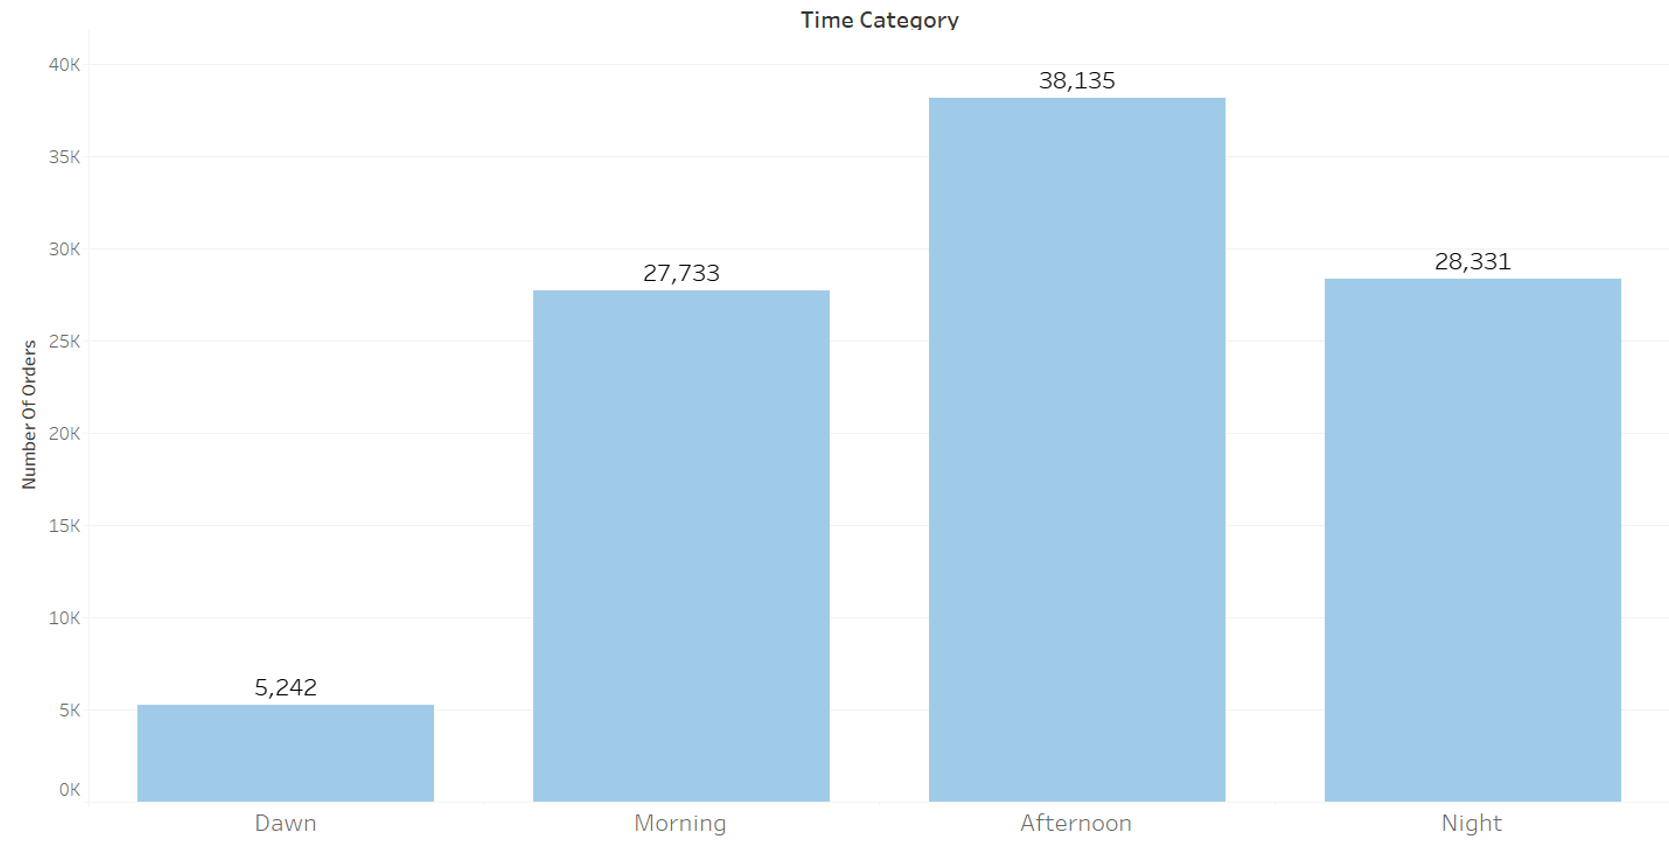

###**Query 2.2 : Analysing Order Time**

In [14]:
query = """
WITH OrderTimes AS (
    SELECT
        order_id,
        EXTRACT(HOUR FROM order_purchase_timestamp) AS hour_of_day
    FROM target.orders
)

SELECT
    hour_of_day,
    COUNT(order_id) AS order_count
FROM OrderTimes
GROUP BY hour_of_day
ORDER BY hour_of_day;
"""
df = client.query(query).to_dataframe()
df

,hour_of_day,order_count
0,0,2394
1,1,1170
2,2,510
3,3,272
4,4,206
5,5,188
6,6,502
7,7,1231
8,8,2967
9,9,4785


**Viz: Bar Chart for Hourly Order-Volume Distribution**

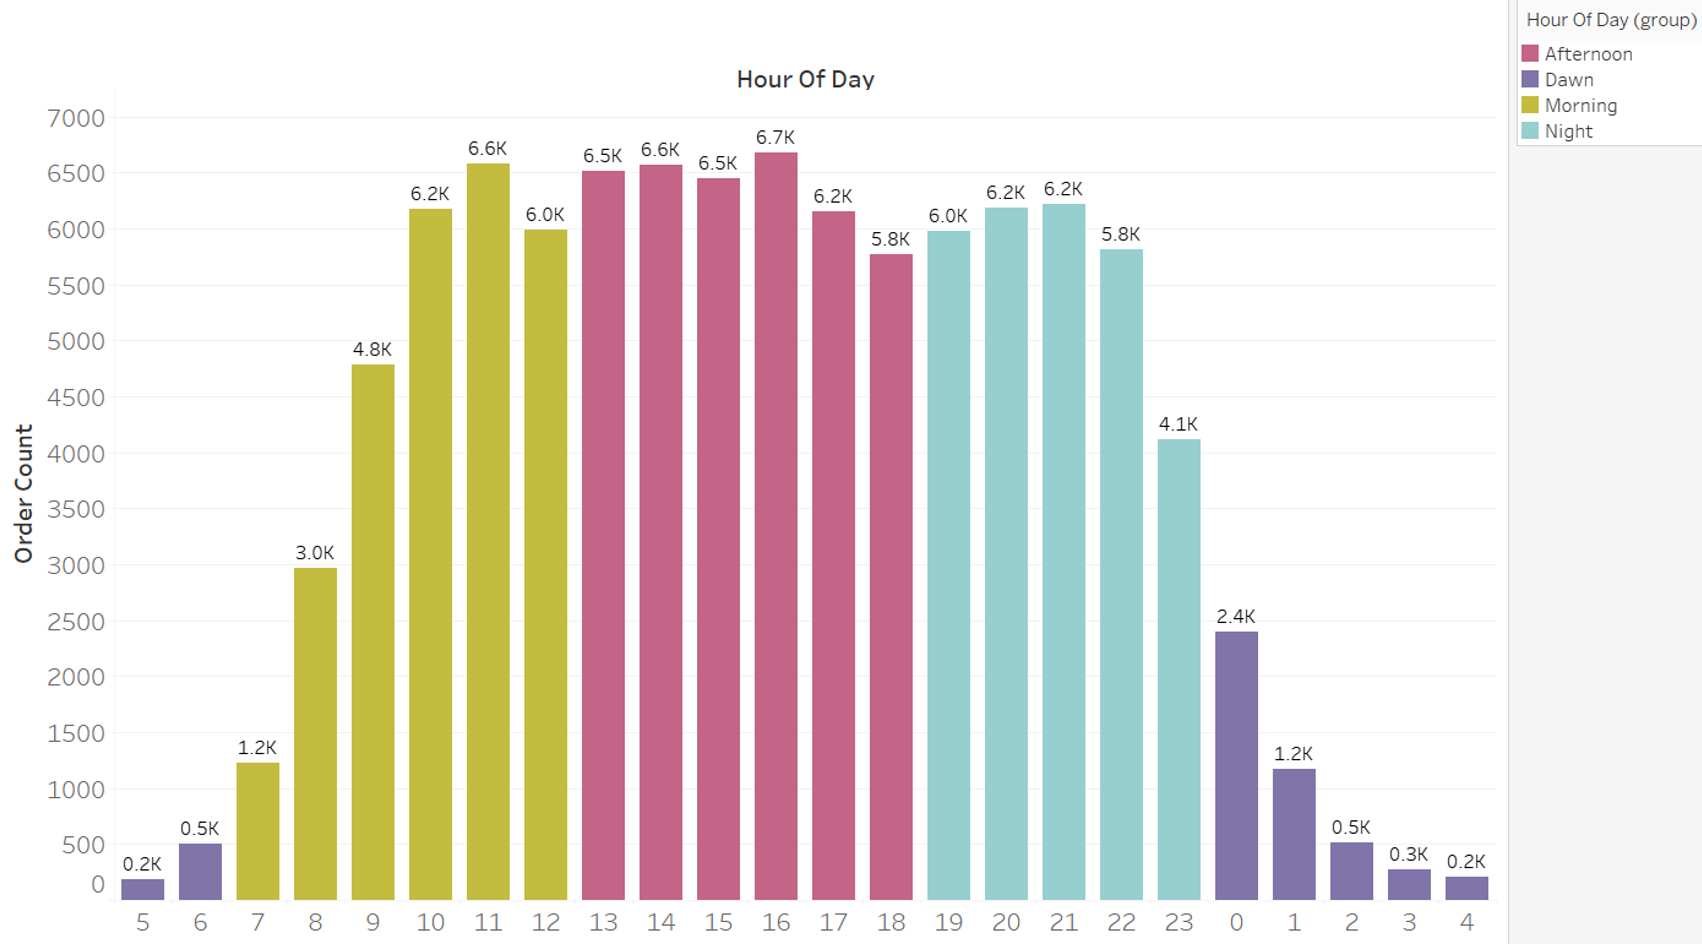

The analysis reveals that the peak order placement consistently occurs from 9 am to 10 pm, with order volumes ranging from **4.5K to 6.7K** during the during the time-frame.


**Inference:** The distribution illustrates the variations in order placements throughout the day, providing insights into customer behaviour and preferences during different time categories. The Morning and Afternoon periods appear to be the busiest, while the Dawn and Night categories experience lower order activity.




# **Section 3: Evolution of E-commerce**

**Monthly Orders Placed in Each State**
To understand the evolution of e-commerce orders in Brazil, we first examine the month-on-month number of orders placed in each state. This analysis provides insights into the ordering trends and potential variations across different regions.



###**Query 3.1 : Month-on-Month Orders Placed by State Analysis**

In [15]:
query = """
SELECT
    EXTRACT(YEAR FROM ord.order_purchase_timestamp) AS order_year,
    EXTRACT(MONTH FROM ord.order_purchase_timestamp) AS order_month,
    GS._Region,
    GS._State_name,
    COUNT(DISTINCT ord.order_id) AS OrderVolumeNos
FROM
    target.order_items AS oi
LEFT JOIN
    target.orders AS ord ON ord.order_id = oi.order_id
LEFT JOIN
    target.customers AS c ON c.customer_id = ord.customer_id
LEFT JOIN
    target.geolocation AS gl ON c.customer_zip_code_prefix = gl.geolocation_zip_code_prefix
LEFT JOIN
    target.geostates AS gs ON gl.geolocation_state = gs._State_Code
WHERE
    ord.order_status = 'delivered' AND gl.geolocation_zip_code_prefix IS NOT NULL
GROUP BY
    order_year,
    order_month,
    GS._Region,
    GS._State_name
ORDER BY
    order_year,
    order_month
"""
df = client.query(query).to_dataframe()
df


,order_year,order_month,_Region,_State_name,OrderVolumeNos
0,2016,9,Southeast,São Paulo,1
1,2016,10,Northeast,Pernambuco,6
2,2016,10,Northeast,Maranhão,4
3,2016,10,North,Pará,4
4,2016,10,Northeast,Ceará,6
...,...,...,...,...,...
551,2018,8,Northeast,Sergipe,23
552,2018,8,Northeast,Paraíba,28
553,2018,8,Northeast,Rio Grande do Norte,20
554,2018,8,North,Tocantins,13


**Viz: Stacked Bar of Chart Order-Volume by Region Over Time**

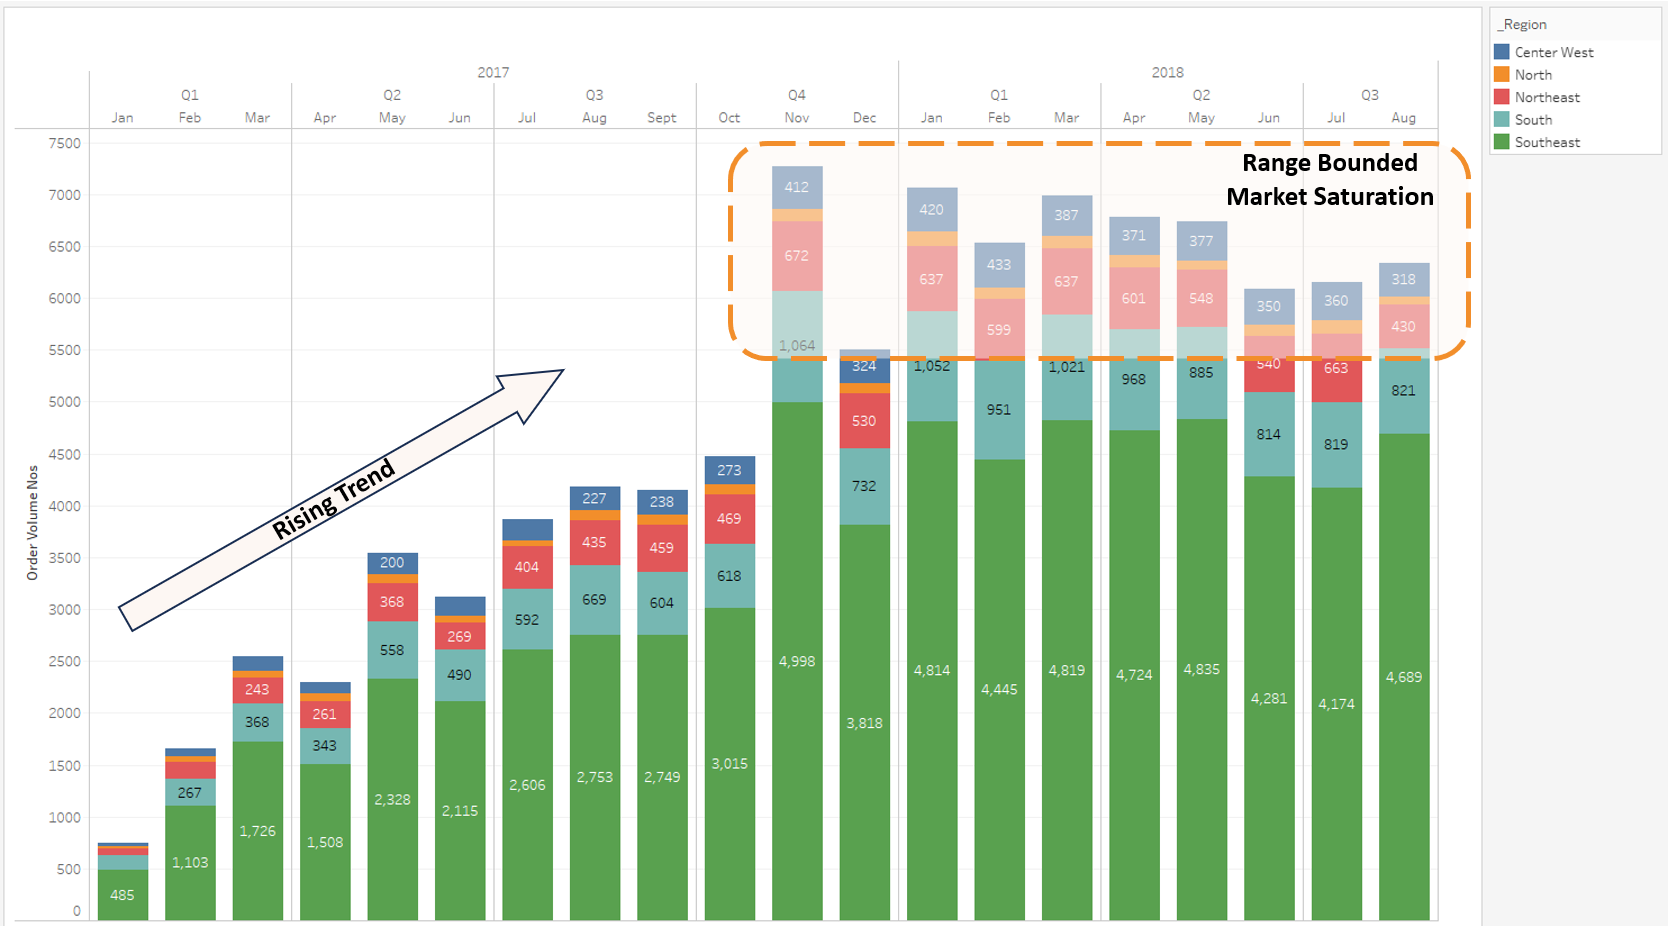

**Viz: Map Chart Order-Volume across Brazilian States**

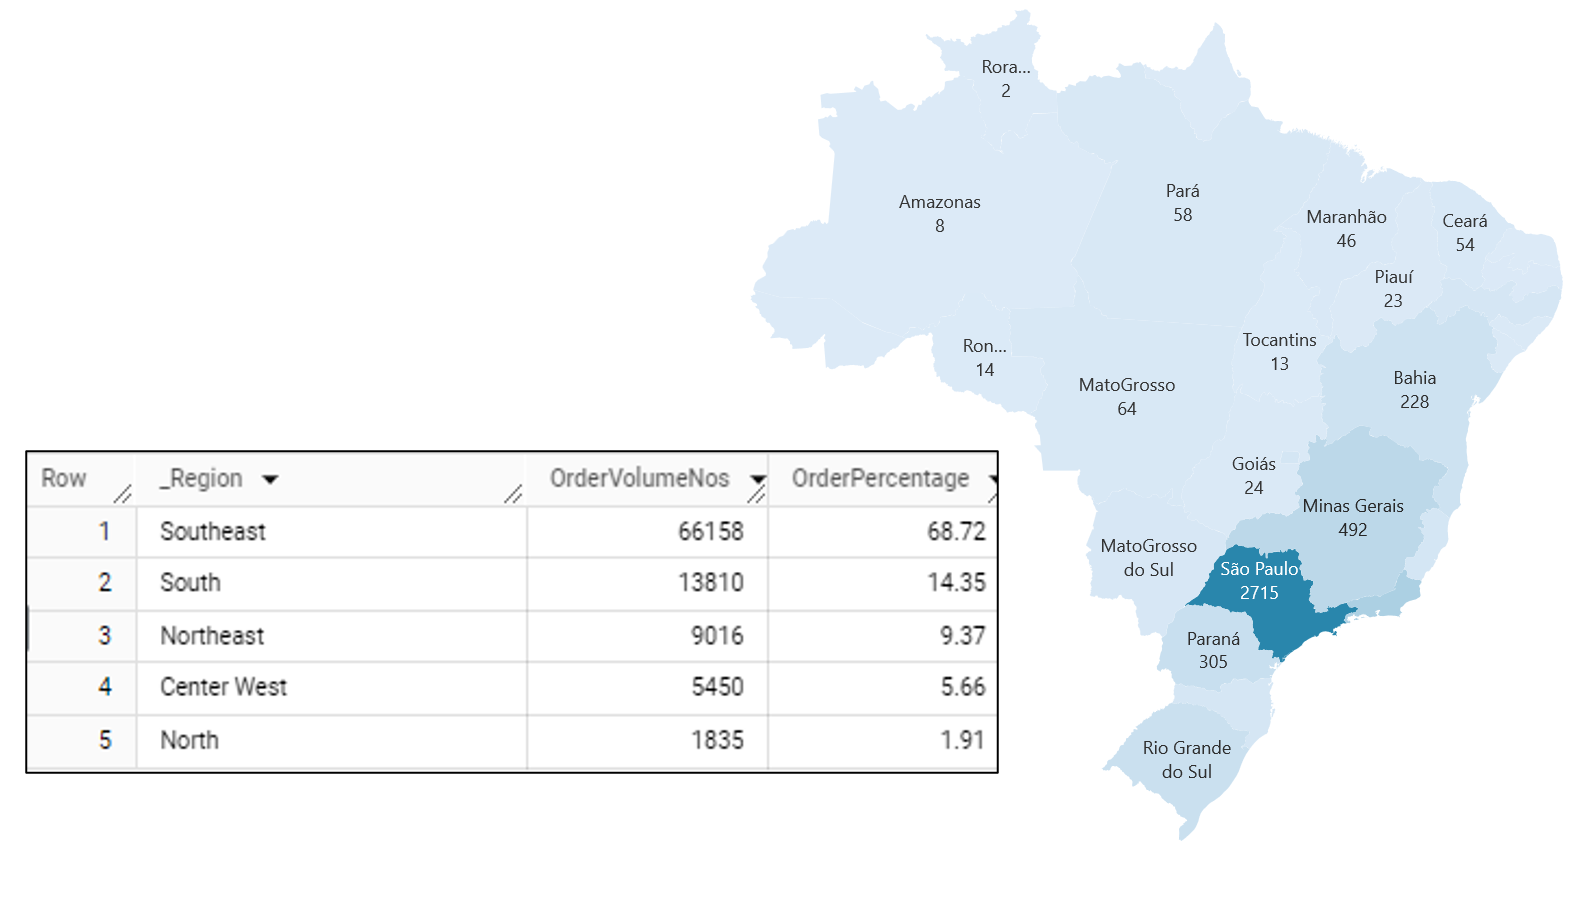

**Inference:**
- **The South-East region** dominates with São Paulo, Rio de Janeiro, and Minas Gerais contributing to *68.7%* of the total order volume.
- **Followed by the South region**, led by Rio Grande do Sul, Paraná, and Santa Catarina, accounts for *14.35%*.
- **Other regions**, including North-East, Center West & North, contribute proportionally, while *Northern states* constitute the remaining small market share.
<br><br>

###**Query 3.2 : Customers Distribution across all the States**

**Customer Distribution Across States**
Additionally, we explore how customers are distributed across all the states in Brazil. This analysis helps in understanding the geographical distribution of customers and identifying regions with higher customer concentration.

By analyzing both the month-on-month orders and customer distribution, we can gain valuable insights into the e-commerce landscape in Brazil and make informed decisions to optimize business strategies.

In [16]:
query = """
WITH CTE AS (
    SELECT
        c.customer_state,
        g._state_name,
        g._region,
        COUNT(customer_unique_id) AS Number_of_customers,
        SUM(COUNT(customer_unique_id)) OVER() AS Total_Customers
    FROM
        target.customers AS c
    LEFT JOIN
        target.geostates AS g ON c.customer_state = g._state_code
    GROUP BY
        c.customer_state, g._state_name, g._region
    ORDER BY
        Number_of_customers DESC
)

SELECT
    CTE.*,
    SUM(CTE.Number_of_customers) OVER(ORDER BY CTE.Number_of_customers DESC) AS RunningTotal,
    round(SUM(CTE.Number_of_customers) OVER(ORDER BY CTE.Number_of_customers DESC) / CTE.Total_Customers,3) AS RunningPertcentage
FROM
    CTE
ORDER BY
    CTE.Number_of_customers DESC;

"""
df = client.query(query).to_dataframe()
df


,customer_state,_state_name,_region,Number_of_customers,Total_Customers,RunningTotal,RunningPertcentage
0,SP,São Paulo,Southeast,41746,99441,41746,0.420
1,RJ,Rio de Janeiro,Southeast,12852,99441,54598,0.549
2,MG,Minas Gerais,Southeast,11635,99441,66233,0.666
3,RS,Rio Grande do Sul,South,5466,99441,71699,0.721
4,PR,Paraná,South,5045,99441,76744,0.772
5,SC,Santa Catarina,South,3637,99441,80381,0.808
6,BA,Bahia,Northeast,3380,99441,83761,0.842
7,DF,Distrito Federal,Center West,2140,99441,85901,0.864
8,ES,Espírito Santo,Southeast,2033,99441,87934,0.884
9,GO,Goiás,Center West,2020,99441,89954,0.905


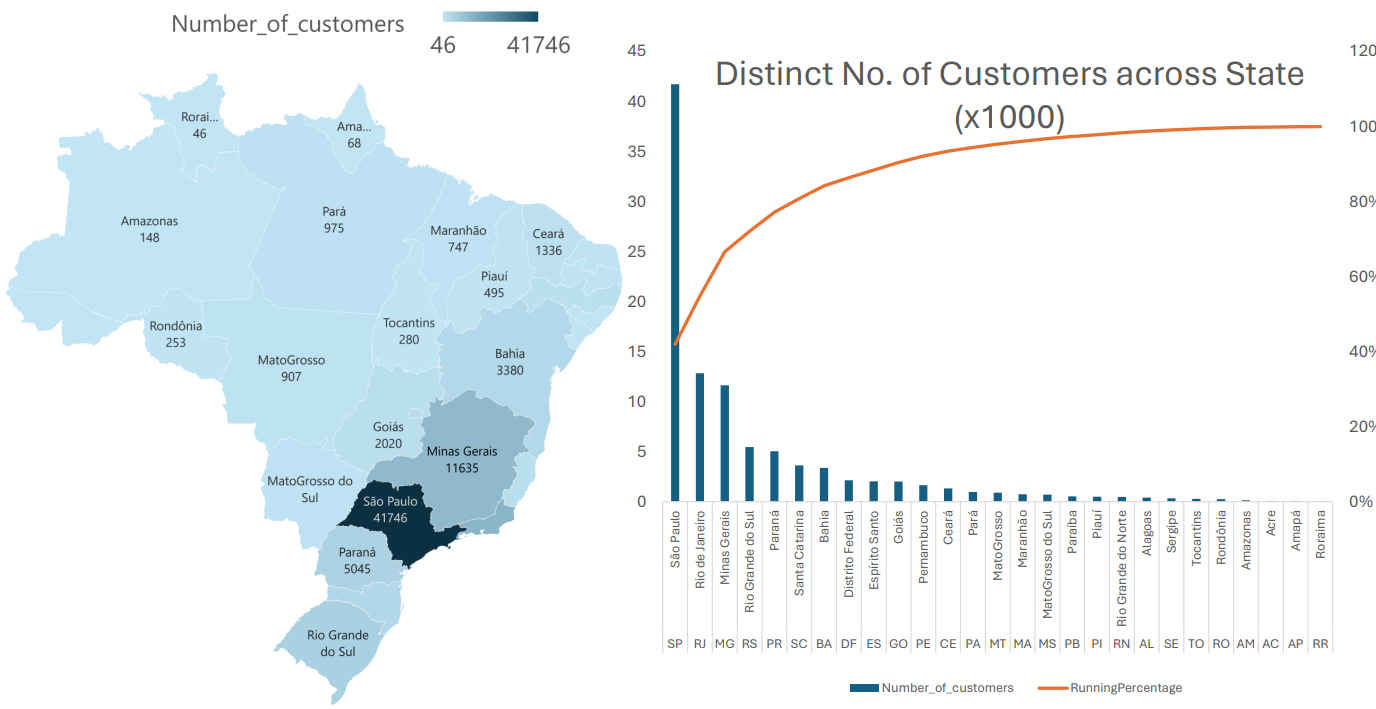

**Viz: 80/20 Rule Visulaised in Map Chart Order-Volume across Brazilian States**

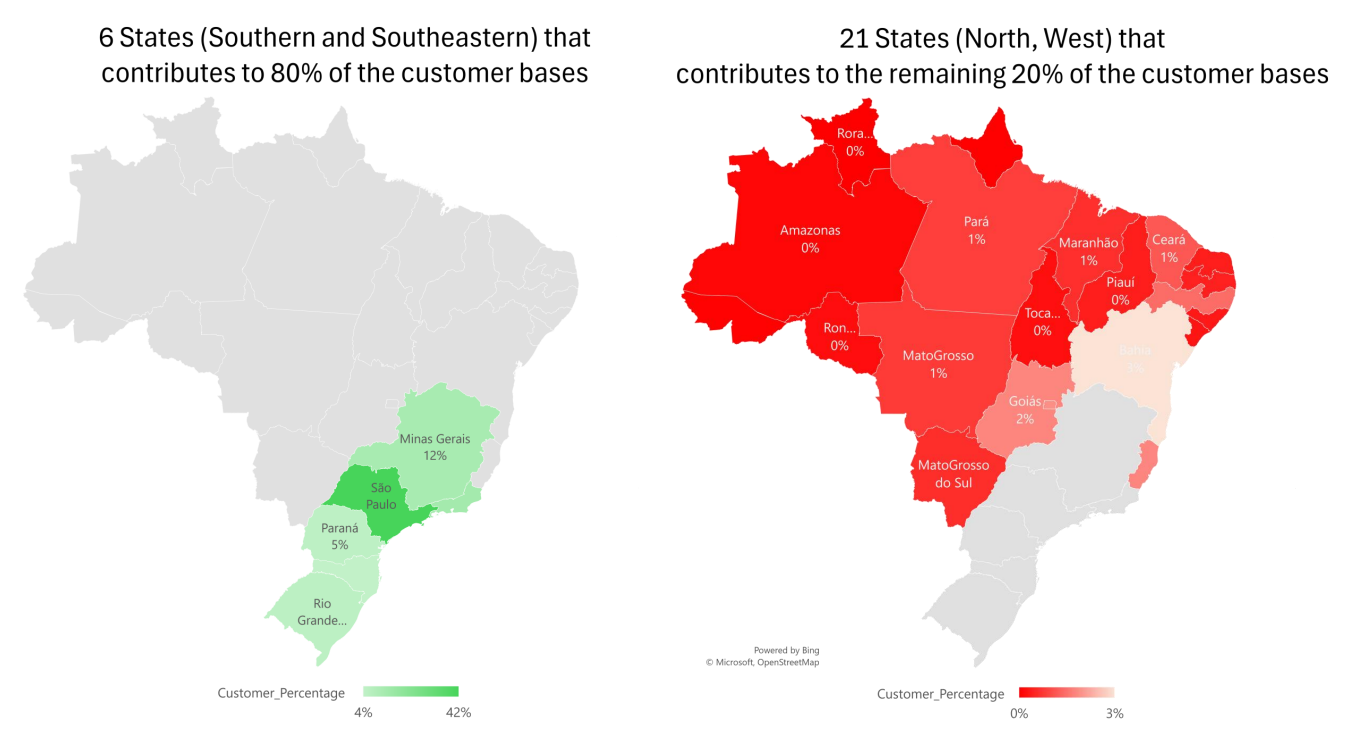



**Inference:**  
The top 6 states in the **Southern and Southeastern** regions contribute around **80%** of the customer base, while the remaining **20%** comes from 21 states in the **North and West** regions. This highlights the significance of focusing marketing and sales efforts on these key states to effectively reach the majority of customers.

# **Section 4: Impact on Economy**

**Analyze the money movement by e-commerce by looking at order prices, freight, and others.**

- **1.** Get the **% increase in the cost of orders** from year **2017 to 2018** (include months between Jan to Aug only).
  - Use the **"payment_value"** column in the **payments** table to get the cost of orders.


###**Query 4.1 : Percentage Increase in Order Costs from 2017 to 2018 (January to August)**

In [17]:
query = """
WITH MonthlyOrderCosts AS (
    SELECT
        EXTRACT(MONTH FROM o.order_approved_at) AS order_month,
        EXTRACT(YEAR FROM o.order_approved_at) AS order_year,
        SUM(CASE WHEN EXTRACT(YEAR FROM o.order_approved_at) = 2017 THEN p.payment_value ELSE 0 END) AS total_order_cost_2017,
        SUM(CASE WHEN EXTRACT(YEAR FROM o.order_approved_at) = 2018 THEN p.payment_value ELSE 0 END) AS total_order_cost_2018
    FROM
        target.orders AS o
    INNER JOIN
        target.payments AS p ON o.order_id = p.order_id
    WHERE
        EXTRACT(YEAR FROM o.order_approved_at) IN (2017, 2018)
        AND EXTRACT(MONTH FROM o.order_approved_at) BETWEEN 1 AND 8
    GROUP BY
        order_year, order_month
)

SELECT
    order_month,
    ROUND(SUM(total_order_cost_2017)) AS cost_of_order_2017,
    ROUND(SUM(total_order_cost_2018)) AS cost_of_order_2018,
    ROUND((SUM(total_order_cost_2018) - SUM(total_order_cost_2017)) / SUM(total_order_cost_2017) * 100, 2) AS percentage_difference
FROM
    MonthlyOrderCosts
GROUP BY
    order_month
ORDER BY
    order_month;
"""
df = client.query(query).to_dataframe()
df

,order_month,cost_of_order_2017,cost_of_order_2018,percentage_difference
0,1,131836.0,1106077.0,738.98
1,2,291836.0,984422.0,237.32
2,3,446021.0,1170383.0,162.41
3,4,413537.0,1137694.0,175.11
4,5,593119.0,1180153.0,98.97
5,6,515294.0,1028018.0,99.50
6,7,585260.0,1043138.0,78.23
7,8,672773.0,1035449.0,53.91


**Viz: Bar Chart 2017-2018 Order-Value in Millions**



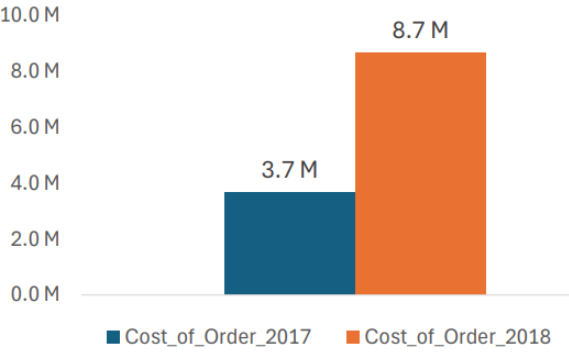

**Viz: 2017-2018 Grouped Bar Chart for Cost of Order-Value in Millions**



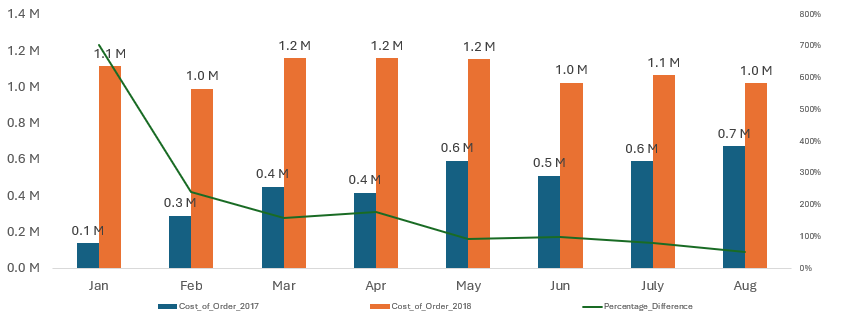

**The cost of orders in January 2018 significantly increased by 705% compared to January 2017.** This suggests a substantial spike in spending during this month.

**The YOY percentage difference line has decreased from 700% to 50% in 8 Months Span rapidly,** this suggests a significant reduction in the rate of growth. Market Saturation, or change in customer behaviour are some potential reasons for this decline.<br><br>


###**Query 4.2 : Analysing the Money movement of E-commerce w.r.t order-prices, Freight, and Others.**

- **2.** Calculate the **Total & Average value of order price** for each state.

- **3.** Calculate the **Total & Average value of order freight** for each state.


In [18]:
query = """
SELECT
    GS._Region,
    GS._State_name,
    ROUND(SUM(oi.price), 0) AS TotalPrice,
    ROUND(SUM(oi.freight_value), 0) AS TotalFreightValue,
    ROUND(AVG(oi.price), 0) AS AvgPrice,
    ROUND(AVG(oi.freight_value), 0) AS AvgFreightValue
FROM
    target.order_items AS oi
LEFT JOIN
    target.orders AS ord ON ord.order_id = oi.order_id
LEFT JOIN
    target.customers AS c ON c.customer_id = ord.customer_id
LEFT JOIN
    target.geolocation AS gl ON c.customer_zip_code_prefix = gl.geolocation_zip_code_prefix
LEFT JOIN
    target.geostates AS gs ON gl.geolocation_state = gs._State_Code
WHERE
    ord.order_status = 'delivered'
    AND gl.geolocation_zip_code_prefix IS NOT NULL
    AND EXTRACT(YEAR FROM ord.order_purchase_timestamp) IN (2017, 2018)
GROUP BY
    GS._Region,
    GS._State_name
ORDER BY
    TotalPrice DESC,
    TotalFreightValue DESC;
"""
df = client.query(query).to_dataframe()
df


,_Region,_State_name,TotalPrice,TotalFreightValue,AvgPrice,AvgFreightValue
0,Southeast,São Paulo,691706291.0,96165632.0,111.0,15.0
1,Southeast,Rio de Janeiro,424582035.0,69769628.0,127.0,21.0
2,Southeast,Minas Gerais,388386593.0,65753767.0,121.0,20.0
3,South,Rio Grande do Sul,107667088.0,19438767.0,118.0,21.0
4,South,Paraná,82923177.0,14095444.0,118.0,20.0
5,South,Santa Catarina,77301804.0,13157070.0,127.0,22.0
6,Northeast,Bahia,60135681.0,11111654.0,148.0,27.0
7,Southeast,Espírito Santo,42680405.0,7679923.0,122.0,22.0
8,Center West,MatoGrosso,22386747.0,4099449.0,156.0,29.0
9,Center West,Goiás,19261544.0,3455392.0,127.0,23.0


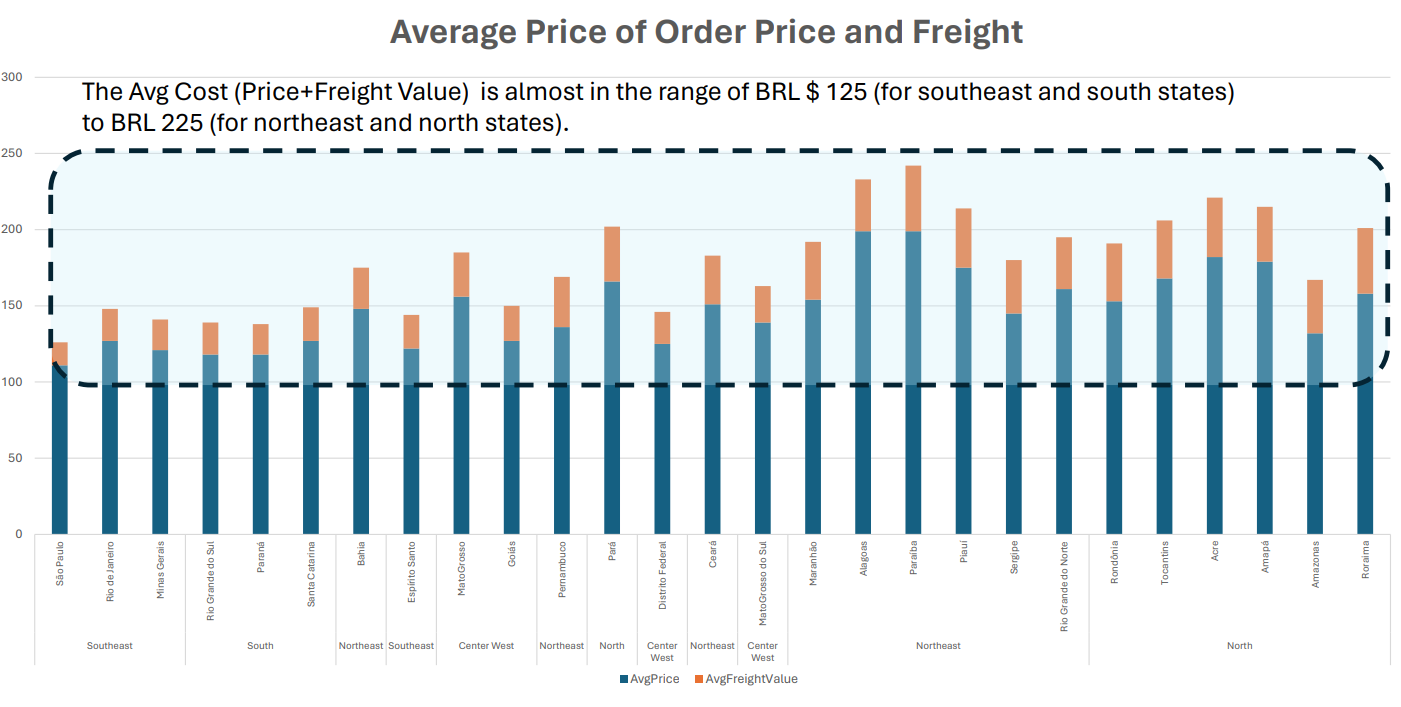

#**Section 5:  Analysis based on Sales, Freight and Delivery time.**

**1.** Find the no. of days taken to deliver each order from the order’s purchase date as delivery time.  
Also, calculate the difference (in days) between the estimated & actual delivery date of an order.  
*Do this in a single query.*
You can calculate the delivery time and the difference between the estimated & actual delivery date using the given formula:
   - `time_to_deliver = order_delivered_customer_date - order_purchase_timestamp`
   - `diff_estimated_delivery = order_delivered_customer_date - order_estimated_delivery_date`

**2.** Find out the **top 5 states with the highest & lowest average freight value**.

**3.** Find out the **top 5 states with the highest & lowest average delivery time**.

**4.** Find out the **top 5 states where the order delivery is really fast** as compared to the estimated date of delivery.  
You can use the difference between the averages of actual & estimated delivery date to figure out how fast the delivery was for each state.


###**Query 5.1 : Analyzing Order Delivery Time and Estimation Accuracy.**

In [19]:
query = """
SELECT
    order_id,
    order_purchase_timestamp,
    order_delivered_customer_date,
    order_estimated_delivery_date,
    DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS Actual_Delivery_Time,
    DATE_DIFF(order_delivered_customer_date, order_estimated_delivery_date, DAY) AS Delivery_Difference,
    DATE_DIFF(order_estimated_delivery_date, order_purchase_timestamp, DAY) AS Estimated_Delivery_Time
FROM
    target.orders
WHERE
    order_status = 'delivered';
"""
df = client.query(query).to_dataframe()
df


,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,Actual_Delivery_Time,Delivery_Difference,Estimated_Delivery_Time
0,cec8f5f7a13e5ab934a486ec9eb713c8,2017-03-17 15:56:47+00:00,2017-04-07 13:14:56+00:00,2017-05-18 00:00:00+00:00,20,-40,61
1,58527ee4726911bee84a0f42cdd797c1,2017-03-20 11:01:17+00:00,2017-03-30 14:04:04+00:00,2017-05-18 00:00:00+00:00,10,-48,58
2,10ed5499d1623638ee810eff1deccded,2017-03-21 13:38:25+00:00,2017-04-18 13:52:43+00:00,2017-05-18 00:00:00+00:00,28,-29,57
3,818996ea247803ddc123789f2bd6046b,2018-08-20 15:56:23+00:00,2018-08-29 22:52:40+00:00,2018-10-04 00:00:00+00:00,9,-35,44
4,d195cac9ccaa1394ede717d38d075fac,2018-08-12 18:14:29+00:00,2018-08-23 02:08:44+00:00,2018-10-04 00:00:00+00:00,10,-41,52
...,...,...,...,...,...,...,...
96473,5cca24359ca7443aa609e17be46a0990,2017-08-18 02:37:16+00:00,2017-08-29 23:37:50+00:00,2017-09-28 00:00:00+00:00,11,-29,40
96474,d16d1a7491ec2a06c392744f9177d1ef,2017-04-20 11:09:34+00:00,2017-05-04 22:46:45+00:00,2017-05-31 00:00:00+00:00,14,-26,40
96475,8ad883016b6266c5cbbface4f5e4ecab,2017-04-20 15:59:14+00:00,2017-05-04 16:18:49+00:00,2017-05-31 00:00:00+00:00,14,-26,40
96476,ceecac582f10037ad46fd4fdc529e0f7,2018-02-10 13:57:41+00:00,2018-03-09 22:14:29+00:00,2018-03-23 00:00:00+00:00,27,-13,40


In [20]:
query = """
WITH Delivery AS (
    SELECT
        order_id,
        order_purchase_timestamp,
        order_delivered_customer_date,
        order_estimated_delivery_date,
        DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS Actual_Delivery_Time,
        DATE_DIFF(order_delivered_customer_date, order_estimated_delivery_date, DAY) AS Delivery_Difference,
        DATE_DIFF(order_estimated_delivery_date, order_purchase_timestamp, DAY) AS Estimated_Delivery_Time,
        CASE
            WHEN DATE_DIFF(order_delivered_customer_date, order_estimated_delivery_date, DAY) < 0 THEN 'Early Delivery'
            WHEN DATE_DIFF(order_delivered_customer_date, order_estimated_delivery_date, DAY) > 0 THEN 'Late Time Delivery'
            WHEN DATE_DIFF(order_delivered_customer_date, order_estimated_delivery_date, DAY) = 0 THEN 'On Time Delivery'
            ELSE 'Order in Transit'
        END AS Delivery_Status
    FROM
        target.orders
    WHERE
        order_status = 'delivered'
)
SELECT
    delivery_Status,
    COUNT(1) AS DeliveryCount,
    ROUND(COUNT(1) / SUM(COUNT(1)) OVER () * 100, 2) AS Percentage
FROM
    Delivery
GROUP BY
    delivery_Status
ORDER BY
    DeliveryCount DESC;

"""
df = client.query(query).to_dataframe()
df


,delivery_Status,DeliveryCount,Percentage
0,Early Delivery,87182,90.36
1,Late Time Delivery,6534,6.77
2,On Time Delivery,2754,2.85
3,Order in Transit,8,0.01


**Inference:** <br>
This breakdown provides insights into the distribution of delivery. <br>The majority of deliveries are **Early Delivery** while **Late Delivery** & **On-time delivery** make up a smaller proportions. <br>The "Order in Transit" category is minimal, suggesting a well-managed delivery process.<br><br>


###**Query 5.2a : Highest Avg Freight Value.**

In [21]:
query = """
WITH StateAvgFreightCost AS (
    SELECT
        GS._Region,
        GS._State_name,
        ROUND(AVG(oi.freight_value), 0) AS AvgFreightValue
    FROM
        target.order_items AS oi
        LEFT JOIN target.orders AS ord ON ord.order_id = oi.order_id
        LEFT JOIN target.customers AS c ON c.customer_id = ord.customer_id
        LEFT JOIN target.geolocation AS gl ON c.customer_zip_code_prefix = gl.geolocation_zip_code_prefix
        LEFT JOIN target.geostates AS gs ON gl.geolocation_state = gs._State_Code
    WHERE
        ord.order_status = 'delivered'
        AND gl.geolocation_zip_code_prefix IS NOT NULL
        AND EXTRACT(YEAR FROM ord.order_purchase_timestamp) IN (2017, 2018)
    GROUP BY
        GS._Region,
        GS._State_name
)
SELECT
    _Region,
    _State_name,
    AvgFreightValue
FROM
    StateAvgFreightCost
WHERE
    _State_name IS NOT NULL
ORDER BY
    AvgFreightValue DESC
LIMIT 5;

"""
df = client.query(query).to_dataframe()
df


,_Region,_State_name,AvgFreightValue
0,North,Roraima,43.0
1,Northeast,Paraíba,43.0
2,Northeast,Piauí,39.0
3,North,Acre,39.0
4,North,Tocantins,38.0


###**Query 5.2b : Lowest Avg Freight Value.**

In [22]:
query = """
WITH StateAvgFreightCost AS (
    SELECT
        GS._Region,
        GS._State_name,
        ROUND(AVG(oi.freight_value), 0) AS AvgFreightValue
    FROM
        target.order_items AS oi
        LEFT JOIN target.orders AS ord ON ord.order_id = oi.order_id
        LEFT JOIN target.customers AS c ON c.customer_id = ord.customer_id
        LEFT JOIN target.geolocation AS gl ON c.customer_zip_code_prefix = gl.geolocation_zip_code_prefix
        LEFT JOIN target.geostates AS gs ON gl.geolocation_state = gs._State_Code
    WHERE
        ord.order_status = 'delivered'
        AND gl.geolocation_zip_code_prefix IS NOT NULL
        AND EXTRACT(YEAR FROM ord.order_purchase_timestamp) IN (2017, 2018)
    GROUP BY
        GS._Region,
        GS._State_name
)
SELECT
    _Region,
    _State_name,
    AvgFreightValue
FROM
    StateAvgFreightCost
WHERE
    _State_name IS NOT NULL
ORDER BY
    AvgFreightValue ASC
LIMIT 5;

"""
df = client.query(query).to_dataframe()
df


,_Region,_State_name,AvgFreightValue
0,Southeast,São Paulo,15.0
1,Southeast,Minas Gerais,20.0
2,South,Paraná,20.0
3,Southeast,Rio de Janeiro,21.0
4,South,Rio Grande do Sul,21.0


###**Query 5.3a : Highest Avg Delivery Time.**


In [23]:
query = """
WITH StateAvgDeliveryTime AS (
    SELECT
        GS._Region,
        GS._State_name,
        AVG(DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY)) AS AvgDeliveryTime
    FROM
        target.orders AS ord
        LEFT JOIN target.customers AS c ON c.customer_id = ord.customer_id
        LEFT JOIN target.geolocation AS gl ON c.customer_zip_code_prefix = gl.geolocation_zip_code_prefix
        LEFT JOIN target.geostates AS gs ON gl.geolocation_state = gs._State_Code
    WHERE
        ord.order_status = 'delivered'
        AND gl.geolocation_zip_code_prefix IS NOT NULL
        AND EXTRACT(YEAR FROM ord.order_purchase_timestamp) IN (2017, 2018)
    GROUP BY
        GS._Region,
        GS._State_name
)
SELECT
    _Region,
    _State_name,
    ROUND(AvgDeliveryTime, 0) AS AvgDeliveryTime
FROM
    StateAvgDeliveryTime
WHERE
    _State_name IS NOT NULL
ORDER BY
    AvgDeliveryTime DESC
LIMIT 5;

"""
df = client.query(query).to_dataframe()
df


,_Region,_State_name,AvgDeliveryTime
0,North,Amapá,28.0
1,North,Roraima,25.0
2,North,Amazonas,25.0
3,Northeast,Alagoas,23.0
4,North,Pará,23.0


###**Query 5.3b : Lowest Avg Delivery Time.**


In [24]:
query = """
WITH StateAvgDeliveryTime AS (
    SELECT
        GS._Region,
        GS._State_name,
        AVG(DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY)) AS AvgDeliveryTime
    FROM
        target.orders AS ord
        LEFT JOIN target.customers AS c ON c.customer_id = ord.customer_id
        LEFT JOIN target.geolocation AS gl ON c.customer_zip_code_prefix = gl.geolocation_zip_code_prefix
        LEFT JOIN target.geostates AS gs ON gl.geolocation_state = gs._State_Code
    WHERE
        ord.order_status = 'delivered'
        AND gl.geolocation_zip_code_prefix IS NOT NULL
        AND EXTRACT(YEAR FROM ord.order_purchase_timestamp) IN (2017, 2018)
    GROUP BY
        GS._Region,
        GS._State_name
)
SELECT
    _Region,
    _State_name,
    ROUND(AvgDeliveryTime, 0) AS AvgDeliveryTime
FROM
    StateAvgDeliveryTime
WHERE
    _State_name IS NOT NULL
ORDER BY
    AvgDeliveryTime ASC
LIMIT 5;

"""
df = client.query(query).to_dataframe()
df

,_Region,_State_name,AvgDeliveryTime
0,Southeast,São Paulo,8.0
1,South,Paraná,11.0
2,Southeast,Minas Gerais,11.0
3,Center West,Distrito Federal,12.0
4,South,Santa Catarina,14.0


###**Query 5.4 : Identifying Top 5 States with Faster-than-Estimated Order Deliveries**


In [25]:
query = """
WITH StateFastDelivery AS (
    SELECT
        GS._Region,
        GS._State_name,
        AVG(DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY)) AS AvgActualDeliveryTime,
        AVG(DATE_DIFF(order_estimated_delivery_date, order_purchase_timestamp, DAY)) AS AvgEstimatedDeliveryTime
    FROM
        target.orders AS ord
        LEFT JOIN target.customers AS c ON c.customer_id = ord.customer_id
        LEFT JOIN target.geolocation AS gl ON c.customer_zip_code_prefix = gl.geolocation_zip_code_prefix
        LEFT JOIN target.geostates AS gs ON gl.geolocation_state = gs._State_Code
    WHERE
        ord.order_status = 'delivered'
        AND gl.geolocation_zip_code_prefix IS NOT NULL
        AND EXTRACT(YEAR FROM ord.order_purchase_timestamp) IN (2017, 2018)
    GROUP BY
        GS._Region,
        GS._State_name
)
SELECT
    _Region,
    _State_name,
    ROUND(AvgActualDeliveryTime, 0) AS AvgActualDeliveryTime,
    ROUND(AvgEstimatedDeliveryTime, 0) AS AvgEstimatedDeliveryTime,
    ROUND(AvgActualDeliveryTime - AvgEstimatedDeliveryTime, 0) AS DeliveryTimeDifference
FROM
    StateFastDelivery
WHERE
    _State_name IS NOT NULL
ORDER BY
    DeliveryTimeDifference ASC
LIMIT 5;
"""
df = client.query(query).to_dataframe()
df

,_Region,_State_name,AvgActualDeliveryTime,AvgEstimatedDeliveryTime,DeliveryTimeDifference
0,North,Amazonas,25.0,45.0,-20.0
1,North,Roraima,25.0,44.0,-19.0
2,North,Acre,21.0,39.0,-19.0
3,North,Amapá,28.0,47.0,-19.0
4,North,Rondônia,19.0,38.0,-19.0


#**Section 6 :  Analysis based on the Payments**

###**Query 6.1: Month-on-Month Analysis of Orders Placed by Payment Types.**
   


In [26]:
query = """
SELECT
    EXTRACT(YEAR FROM ord.order_purchase_timestamp) AS Year,
    EXTRACT(MONTH FROM ord.order_purchase_timestamp) AS Month,
    SUM(IF(payment_type = "credit_card", 1, 0)) AS credit_card_Volume_of_Users,
    SUM(IF(payment_type = "voucher", 1, 0)) AS voucher_Volume_of_Users,
    SUM(IF(payment_type = "debit_card", 1, 0)) AS debit_card_Volume_of_Users,
    SUM(IF(payment_type = "UPI", 1, 0)) AS UPI_Volume_of_Users,
    SUM(IF(payment_type = "not_defined", 1, 0)) AS not_defined_Volume_of_Users
FROM
    target.orders AS ord
LEFT JOIN
    target.payments AS pay USING (order_id)
WHERE
    EXTRACT(YEAR FROM ord.order_purchase_timestamp) IN (2017, 2018)
    AND order_status = 'delivered'
GROUP BY
    Year,
    Month
ORDER BY
    CONCAT(Year, LENGTH(CAST(Month AS STRING)), Month);
"""
df = client.query(query).to_dataframe()
df

,Year,Month,credit_card_Volume_of_Users,voucher_Volume_of_Users,debit_card_Volume_of_Users,UPI_Volume_of_Users,not_defined_Volume_of_Users
0,2017,1,542,60,9,188,0
1,2017,2,1257,108,13,371,0
2,2017,3,1908,197,30,565,0
3,2017,4,1772,165,25,474,0
4,2017,5,2733,285,29,740,0
5,2017,6,2373,235,26,689,0
6,2017,7,2974,342,20,811,0
7,2017,8,3186,272,33,902,0
8,2017,9,3183,277,43,868,0
9,2017,10,3416,276,51,955,0


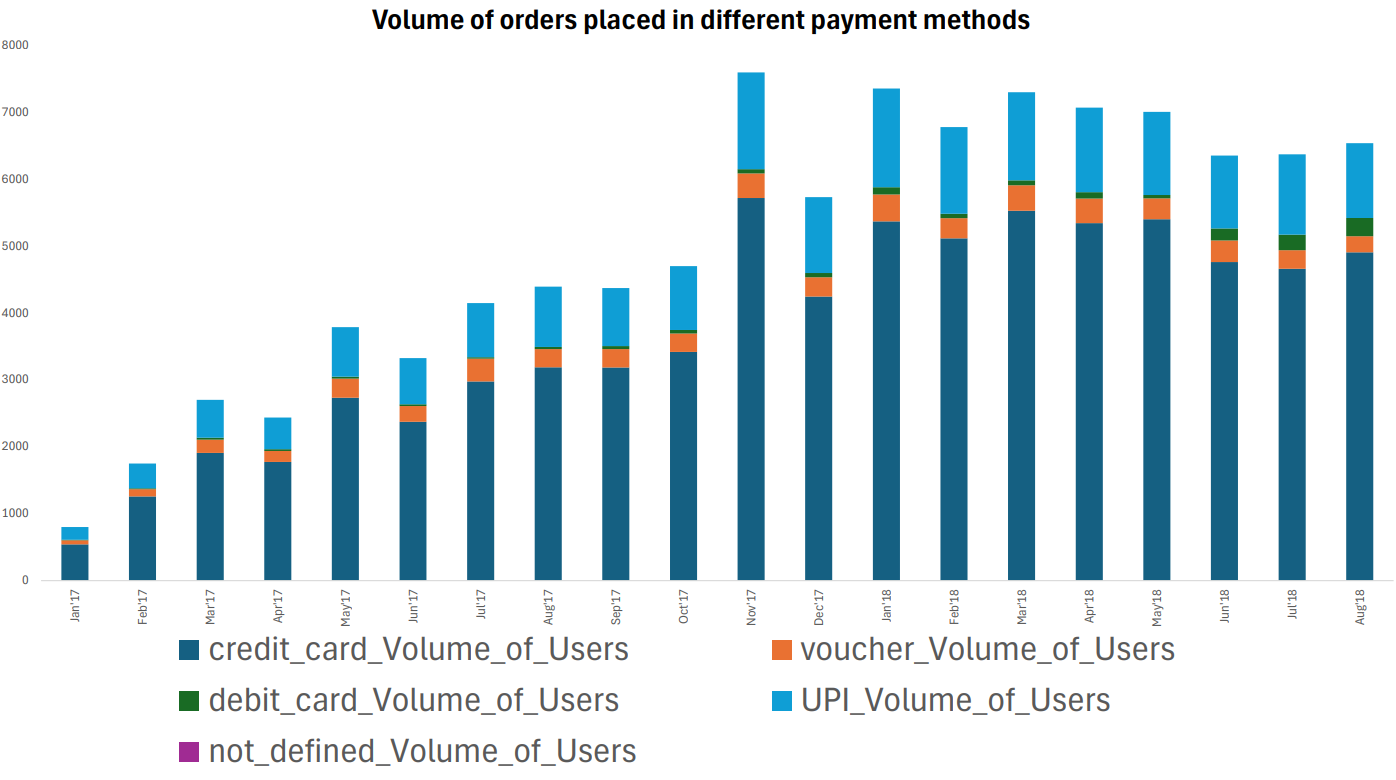

###**Query 6.2: Analysis of Orders Based on Payment Installments Paid.**

In [27]:
query = """
SELECT
    payment_installments,
    COUNT(DISTINCT ord.order_id) AS num_orders,
    ROUND((COUNT(DISTINCT ord.order_id) / SUM(COUNT(DISTINCT ord.order_id)) OVER ()), 2) AS order_density_percentage
FROM
    target.orders AS ord
LEFT JOIN
    target.payments AS pay ON ord.order_id = pay.order_id
WHERE
    EXTRACT(YEAR FROM ord.order_purchase_timestamp) IN (2017, 2018)
    AND order_status = 'delivered'
    AND payment_installments > 0
GROUP BY
    payment_installments
ORDER BY
    payment_installments;
"""
df = client.query(query).to_dataframe()
df


,payment_installments,num_orders,order_density_percentage
0,1,47480,0.49
1,2,12027,0.12
2,3,10113,0.10
3,4,6860,0.07
4,5,5074,0.05
5,6,3785,0.04
6,7,1551,0.02
7,8,4119,0.04
8,9,615,0.01
9,10,5103,0.05


#**Section 7 :  RFM Analysis.**

###**Query 7.1 : RFM Score.**

In [28]:
query = """
WITH CTE AS (
    SELECT
        c.customer_id,
        o.order_id,
        o.order_status,
        TIMESTAMP(o.order_purchase_timestamp) AS order_date,
        p.product_id,
        p.product_category,
        (oi.price + oi.freight_value) AS total_price
    FROM
        target.customers c
        LEFT JOIN target.orders o USING (customer_id)
        LEFT JOIN target.order_items oi USING (order_id)
        LEFT JOIN target.products p USING (product_id)
    WHERE
        o.order_status = 'delivered'
)
SELECT
    customer_id,
    DATE_DIFF(TIMESTAMP('2019-01-01'), MAX(order_date), DAY) AS Recency,
    COUNT(order_id) AS Frequency,
    ROUND(SUM(total_price)) AS Monetary
FROM
    CTE
GROUP BY
    customer_id;
"""
df = client.query(query).to_dataframe()
df.sample(10)


,customer_id,Recency,Frequency,Monetary
42264,011aa301cac8da4d01db88c3180a4058,605,2,412.0
49399,b4187d222b18f51afc5826fe2f09dd33,197,1,134.0
28926,a53e6d8f6610cc95f21f5ee30693f5e8,308,1,178.0
90871,94ce1065665d266c491641637b7bc660,207,1,98.0
65542,4aa8e20c47b647fdad4bc9a4b38964b1,322,1,64.0
66644,3f27dab6f20dfabd52490c042b6a517b,126,1,68.0
26559,ae69b22e0c5f6e1327a91c284eb320c4,297,1,110.0
17954,4cde552228a46393edb70838c52c45a8,685,1,144.0
56270,2c7e09453a08b081ddc049e7ff4f8fa2,166,1,36.0
58397,e536895ab7864eaf78dc9ce8ad805a34,291,1,42.0


###**Query 7.1 : Customer Segmentation.**

In [29]:
query = """
WITH CTE AS (
    SELECT
        c.customer_id,
        o.order_id,
        o.order_status,
        TIMESTAMP(o.order_purchase_timestamp) AS order_date,
        p.product_id,
        p.product_category,
        (oi.price + oi.freight_value) AS total_price
    FROM
        target.customers c
        LEFT JOIN target.orders o USING (customer_id)
        LEFT JOIN target.order_items oi USING (order_id)
        LEFT JOIN target.products p USING (product_id)
    WHERE
        o.order_status = 'delivered'
),
CTE2 AS (
    SELECT
        customer_id,
        DATE_DIFF(TIMESTAMP('2019-01-01'), MAX(order_date), DAY) AS Recency,
        COUNT(order_id) AS Frequency,
        ROUND(SUM(total_price)) AS Monetary
    FROM
        CTE
    GROUP BY
        customer_id
),
RFM_Ntile AS (
    SELECT
        customer_id,
        Recency,
        Frequency,
        Monetary,
        NTILE(5) OVER (ORDER BY Recency DESC) AS R,
        NTILE(5) OVER (ORDER BY Frequency ASC) AS F,
        NTILE(5) OVER (ORDER BY Monetary ASC) AS M,
        ROUND(1/3 * (NTILE(5) OVER (ORDER BY Recency DESC) +
                     NTILE(5) OVER (ORDER BY Frequency ASC) +
                     NTILE(5) OVER (ORDER BY Monetary ASC)), 2) AS RFM
    FROM
        CTE2
    ORDER BY
        CONCAT(R, F, M) DESC
)
SELECT
    *,
    CASE
        WHEN RFM > 4.5 THEN 'Platinum'
        WHEN RFM > 4 THEN 'Gold'
        WHEN RFM > 3.5 THEN 'Silver'
        WHEN RFM > 3 THEN 'Bronze'
        ELSE 'Base'
    END AS Customer_Segment
FROM
    RFM_Ntile;
"""

df = client.query(query).to_dataframe()
df.sample(15)


,customer_id,Recency,Frequency,Monetary,R,F,M,RFM,Customer_Segment
77105,16100ce67e803006c3caab4e1837582f,418,1,35.0,2,1,1,1.33,Base
66294,4ccadb3017d7e9ee8ba9523f00e6759c,397,1,312.0,2,3,5,3.33,Bronze
46331,add27410b616fcff8fbdc616ec5397ce,313,1,211.0,3,3,5,3.67,Silver
92645,6d91da53c1c48b756d84ef4eb54550ab,550,1,595.0,1,1,5,2.33,Base
61950,853dca88fd662dc5711018f1f7932a59,484,1,1942.0,2,4,5,3.67,Silver
16518,c1507b00b2af515ecb680ca0a2438680,174,1,132.0,5,1,4,3.33,Bronze
93144,fc60ab8252b98a6e60c51672d7853c7e,600,1,1981.0,1,1,5,2.33,Base
95693,394b29bca113f3cef535dbc08949043b,552,1,53.0,1,1,1,1.00,Base
26052,9cc370519577c55b9dfa3641b59df63a,282,1,77.0,4,4,2,3.33,Bronze
14111,59d93d62b828a2c8b877ee0a70852f31,137,1,76.0,5,2,2,3.00,Base


<ipython-input-30-701361f433bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Segment', y='Recency', data=df, ax=axes[0], palette='Blues')
<ipython-input-30-701361f433bb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Segment', y='Frequency', data=df, ax=axes[1], palette='Reds')
<ipython-input-30-701361f433bb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Segment', y='Monetary', data=df, ax=axes[2], palette='Greens')


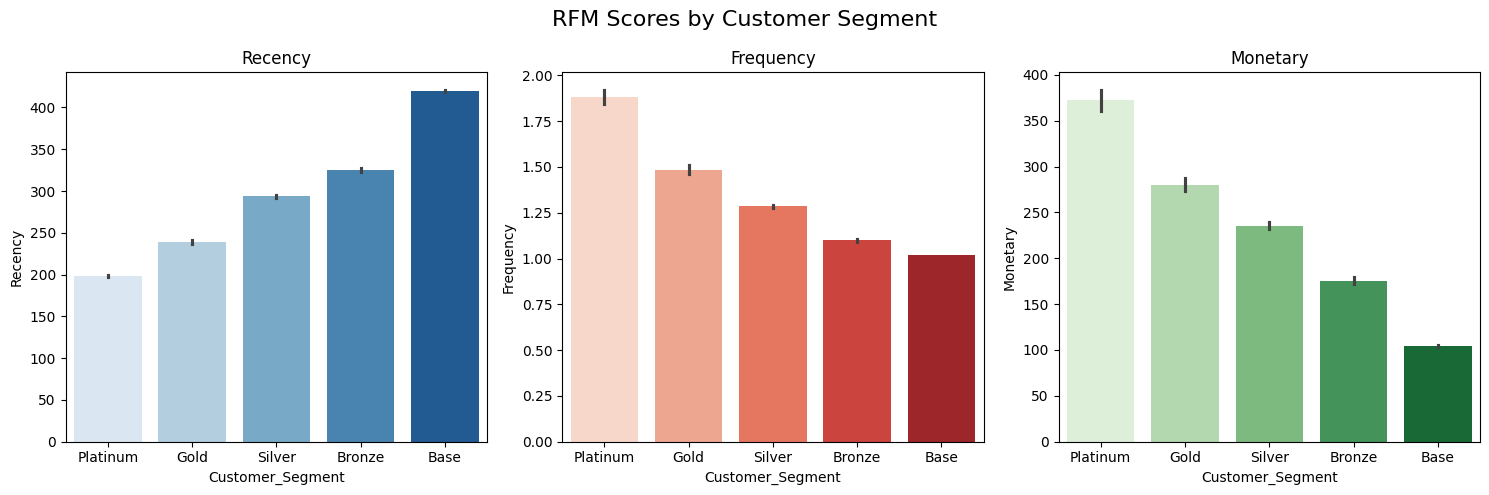

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='Customer_Segment', y='Recency', data=df, ax=axes[0], palette='Blues')
axes[0].set_title('Recency')

sns.barplot(x='Customer_Segment', y='Frequency', data=df, ax=axes[1], palette='Reds')
axes[1].set_title('Frequency')

sns.barplot(x='Customer_Segment', y='Monetary', data=df, ax=axes[2], palette='Greens')
axes[2].set_title('Monetary')

plt.suptitle('RFM Scores by Customer Segment', fontsize=16)

plt.tight_layout()
plt.show()


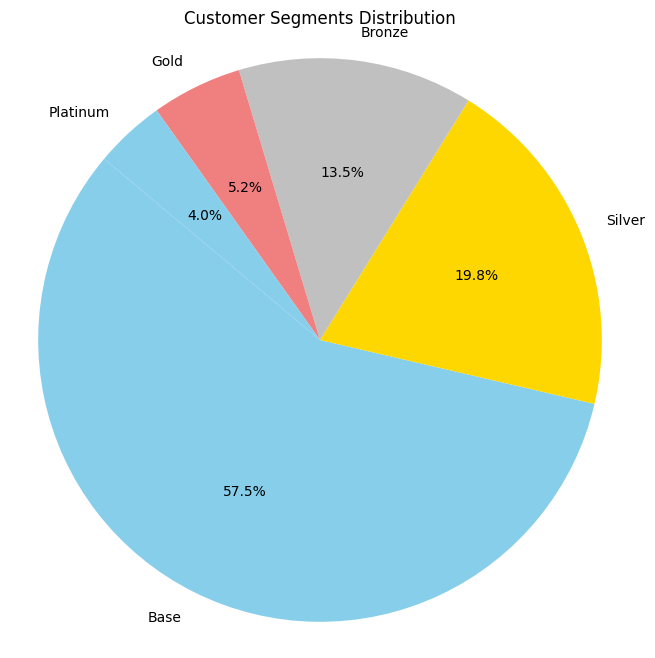

In [31]:
import matplotlib.pyplot as plt

segment_counts = df['Customer_Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'gold', 'silver', 'lightcoral'])
plt.axis('equal')
plt.title('Customer Segments Distribution')
plt.show()

> Observing that the **base customers** comprise 57% of the customer base, the E-commerce store should position their marketing campaign to focus on transitioning base customers into the silver segment, as base customers are most susceptible to churn.

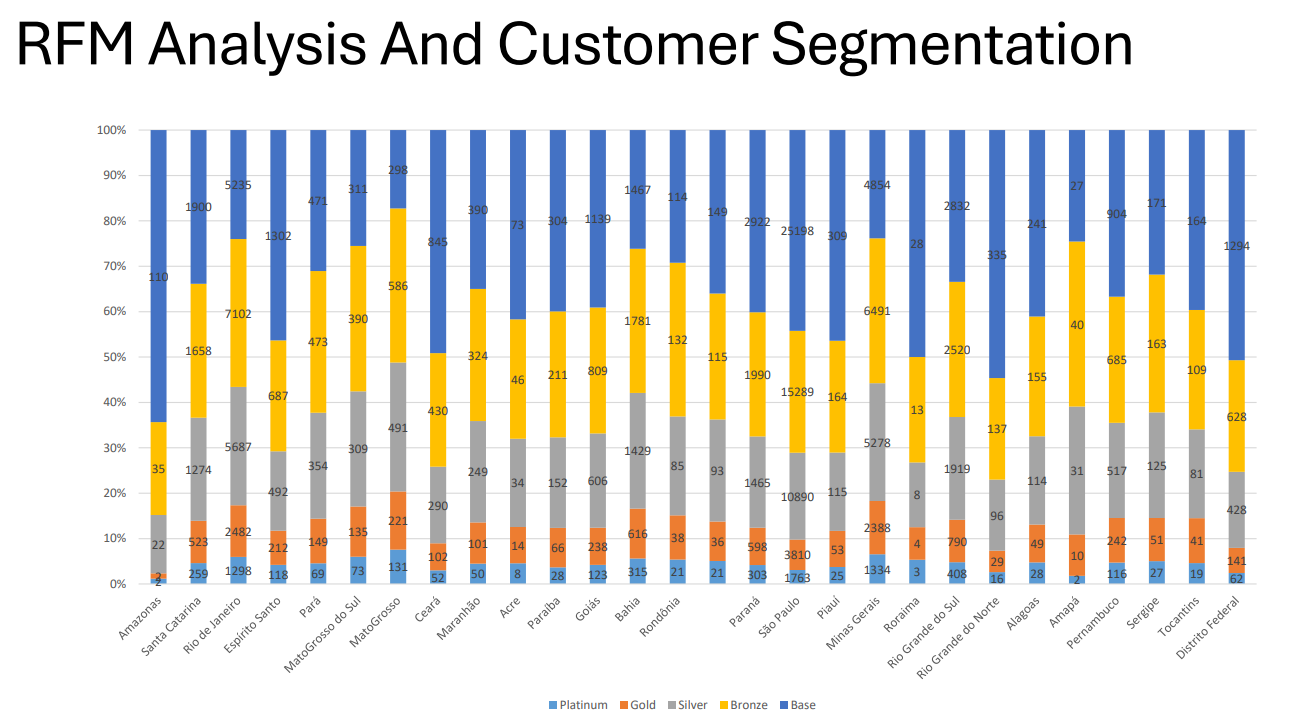

#**Section 8 : Strategizing the Opportunity For Market Caputure**

>## **Recommendations**<br>
### 1. **Retain Platinum and Gold Customers:**
   Implement loyalty programs with exclusive benefits for Platinum and Gold customers (as they represent the majority across all states). Offer personalized discounts, early access to new products, or free shipping to incentivize repeat purchases.
### 2. **Convert Silver and Bronze Customers:**
   Identify Silver and Bronze customers who are close to moving up in their RFM segments. Implement targeted marketing campaigns to encourage more frequent purchases, higher order values, or engagement with your brand.
### 3. **Re-engage Base Customers:**
Identify Base customers who haven't made a purchase recently. Launch reactivation campaigns with special offers, personalized recommendations, or reminders about the value your products/services bring. Focus marketing efforts on the top 6 states in the Southern and Southeastern regions, which contribute around 80% of the customer base.
### 4. **Personalized Marketing:**
   Leverage the insights from RFM analysis to create personalized marketing messages. Send targeted emails or promotions based on each customer's specific RFM segment.
### 5. **Logistics:**
Optimize delivery processes to ensure consistent on-time delivery while minimizing late deliveries.

---
---
